In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.chdir('C:\\Users\\DELL\\Downloads\\Inueron assignment\\machine learning')

In [4]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [5]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [13]:
dict={"Normal_Weight":"Normal", "Overweight_Level_II":"Overweight","Overweight_Level_I":"Overweight", "Obesity_Type_I":"Obesity" ,"Insufficient_Weight":"Underweight" , "Obesity_Type_III":"Extreme Obesity","Obesity_Type_II":"Extreme Obesity"}

In [15]:
dict.keys()

dict_keys(['Normal_Weight', 'Overweight_Level_II', 'Overweight_Level_I', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_III', 'Obesity_Type_II'])

In [16]:
dict.values()

dict_values(['Normal', 'Overweight', 'Overweight', 'Obesity', 'Underweight', 'Extreme Obesity', 'Extreme Obesity'])

In [18]:
df['NObeyesdad']=df['NObeyesdad'].map(dict)

In [19]:
df['NObeyesdad'].value_counts()

Extreme Obesity    621
Overweight         580
Obesity            351
Normal             287
Underweight        272
Name: NObeyesdad, dtype: int64

In [22]:
df.columns=['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'TRANSPORTATION', 'BMI_Indicator']

In [24]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,TRANSPORTATION,BMI_Indicator
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight


In [36]:
df['Gender'].dtypes

dtype('O')

In [37]:
cat_columns=[col for col in df.columns if df[col].dtypes == 'O']

In [38]:
cat_columns

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'TRANSPORTATION',
 'BMI_Indicator']

In [39]:
dict_yes_no={"yes":1,"no":0}

In [40]:
yes_no_col=['family_history_with_overweight','FAVC','SMOKE','SCC']

In [48]:
for col in yes_no_col:
    df[col]=df[col].map(dict_yes_no)

In [50]:
dict_gender={"Male":0,"Female":1}

In [51]:
df['Gender']=df["Gender"].map(dict_gender)

In [55]:
df["CAEC"].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

In [ ]:
dict_4={SometimesFrequently    Always     no}

In [56]:
df["CALC"].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [57]:
df['TRANSPORTATION'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: TRANSPORTATION, dtype: int64

In [59]:
df['CALC'] = df['CALC'].apply(lambda x:['no', 'Sometimes', 'Frequently', 'Always'].index(x))

In [61]:
df["CALC"].value_counts()

1    1401
0     639
2      70
3       1
Name: CALC, dtype: int64

In [68]:
df['CAEC'] = df['CAEC'].apply(lambda x:['no', 'Sometimes', 'Frequently', 'Always'].index(x))

In [69]:
df['CAEC'].value_counts()

1    1765
2     242
3      53
0      51
Name: CAEC, dtype: int64

In [74]:
dict_transport={"Public_Transportation":0,"Automobile":1,"Walking":2,"Motorbike":3,"Bike":4}

In [76]:
df["TRANSPORTATION"]=df["TRANSPORTATION"].map(dict_transport)

In [79]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,TRANSPORTATION,BMI_Indicator
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,Normal
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,Normal
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,Normal
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,2,Overweight
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,Overweight


In [80]:
df.dtypes

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
TRANSPORTATION                      int64
BMI_Indicator                      object
dtype: object

In [81]:
df['BMI_Indicator'].value_counts()

Extreme Obesity    621
Overweight         580
Obesity            351
Normal             287
Underweight        272
Name: BMI_Indicator, dtype: int64

In [82]:
dict_bmi={"Extreme Obesity":4,"Obesity":3,"Overweight":2,"Normal":1,"Underweight":0}

In [84]:
df["BMI_Indicator"]=df["BMI_Indicator"].map(dict_bmi)

In [85]:
df.dtypes

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
TRANSPORTATION                      int64
BMI_Indicator                       int64
dtype: object

In [86]:
len(df.columns)

17

In [92]:
import warnings
warnings.filterwarnings(action="ignore")

<function matplotlib.pyplot.show(close=None, block=None)>

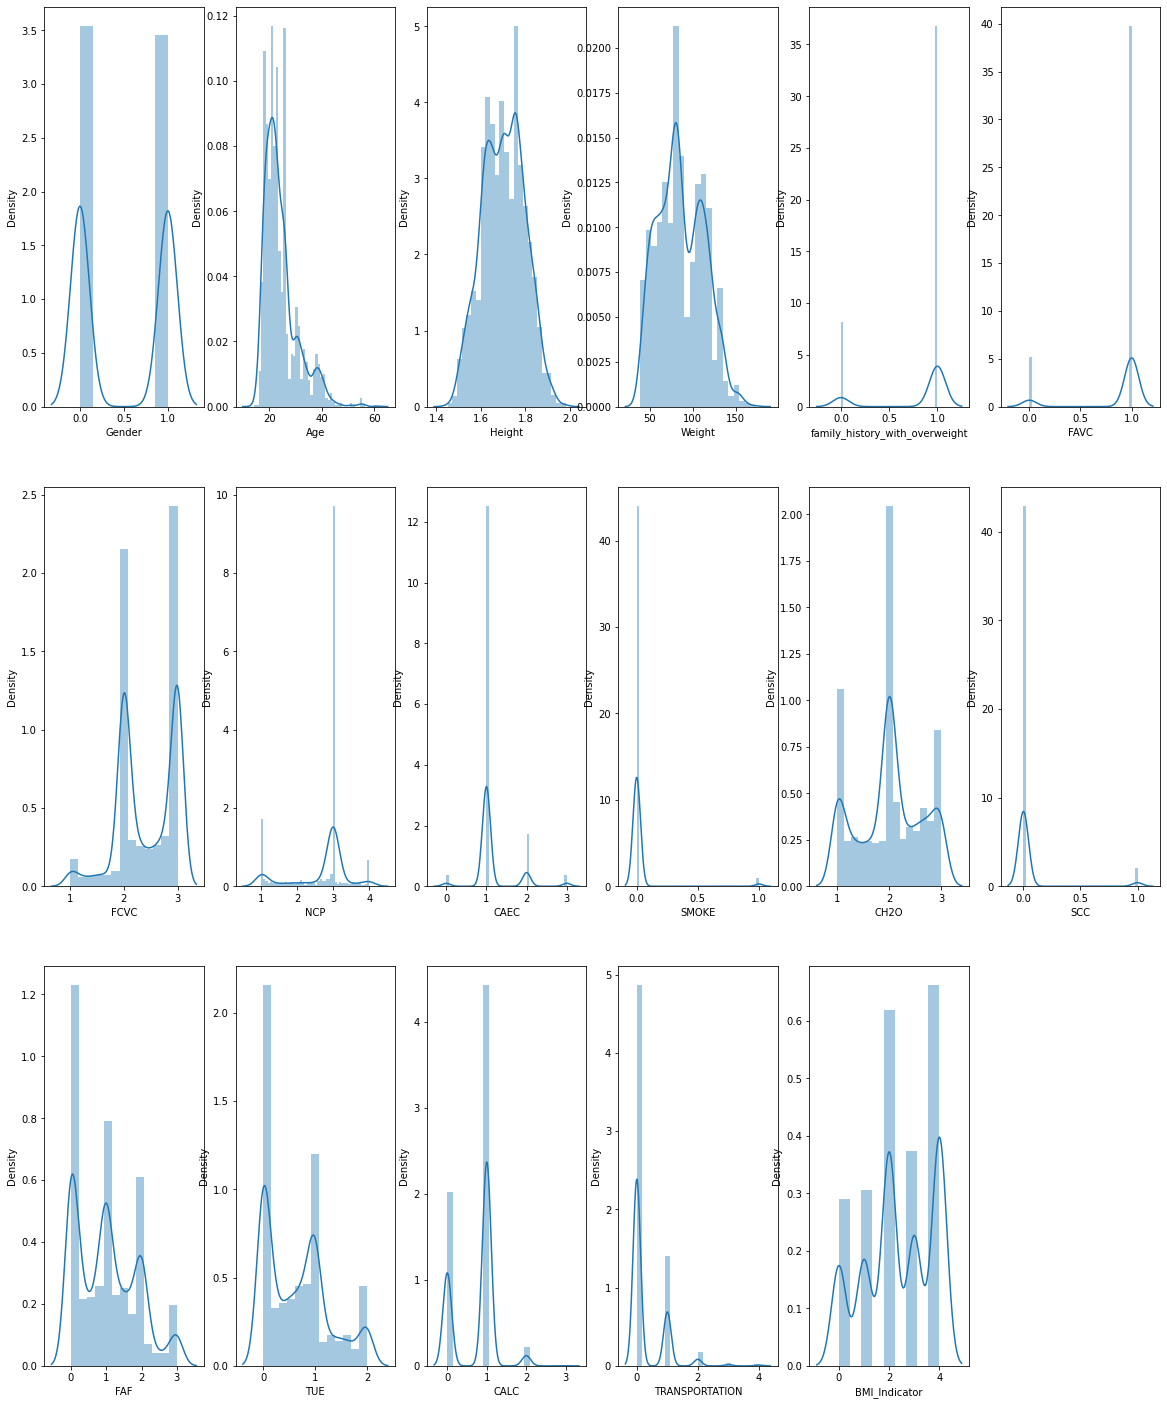

In [93]:
plt.figure(figsize=(20,25))
plot_number=1
for col in  df:
    ax=plt.subplot(3,6,plot_number)
    sns.distplot(df[col])
    plt.xlabel(col)
    plot_number+=1
plt.show

In [94]:
features=df.drop(columns=["BMI_Indicator"])

In [95]:
label=df["BMI_Indicator"]

In [96]:
features.shape

(2111, 16)

In [97]:
label.shape


(2111,)

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scaler=StandardScaler()

In [101]:
scaled_features=pd.DataFrame(scaler.fit_transform(features),columns=features.columns)

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [103]:
x_train,x_test,y_train,y_test=train_test_split(scaled_features,label,test_size=0.20,random_state=42)

In [104]:
rf=RandomForestClassifier()

In [105]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [107]:
pred_rf=rf.predict(x_test)

In [109]:
accuracy_score(y_test,pred_rf)

0.9550827423167849

In [110]:
xgb=XGBClassifier()

In [111]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [112]:
pred_xgb=xgb.predict(x_test)

In [113]:
accuracy_score(y_test,pred_xgb)

0.9598108747044918

In [114]:
svc=SVC()

In [115]:
svc.fit(x_train,y_train)

SVC()

In [116]:
pred_svc=svc.predict(x_test)

In [117]:
accuracy_score(y_test,pred_svc)

0.9054373522458629

In [118]:
log=LogisticRegression()

In [119]:
log.fit(x_train,y_train)

LogisticRegression()

In [121]:
pred_log=log.predict(x_test)

In [122]:
accuracy_score(y_test,pred_log)

0.9314420803782506